In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Datamining/


 airline-passengers.csv			   groceriesdataset2.csv        station_day.csv
 california-house-prices		   groceriesdataset.csv         train.csv
 city_hour.csv				   house-prediction-train.csv   TSLA.csv
'Data Science ML Full Stack Roadmap.pdf'   ieee-fraud-detection
 energy_dataset.csv			   realKnownCause


In [ ]:
import pandas as pd

# Replace with the actual path to your train.csv file in Google Drive
file_path = '/content/drive/MyDrive/Datamining/train.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

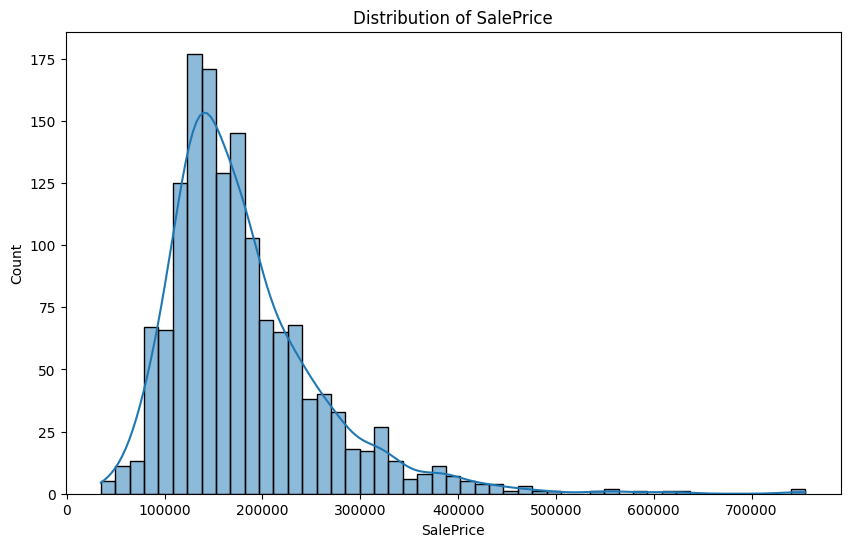

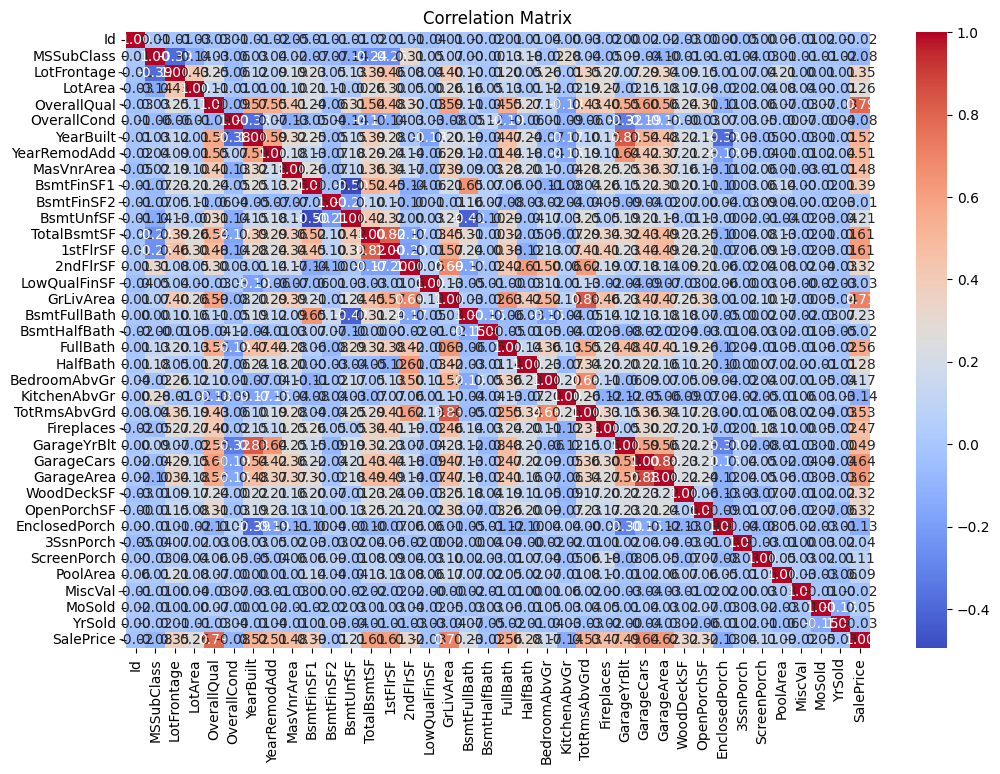

In [ ]:
# Check basic info about the data
print(data.info())

# Display basic statistics
print(data.describe())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing values:\n", missing_values[missing_values > 0])

# Plot the distribution of the target variable (SalePrice)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

# Filter the data to only include numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix for numerical columns only
plt.figure(figsize=(12, 8))
corr_matrix = numerical_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


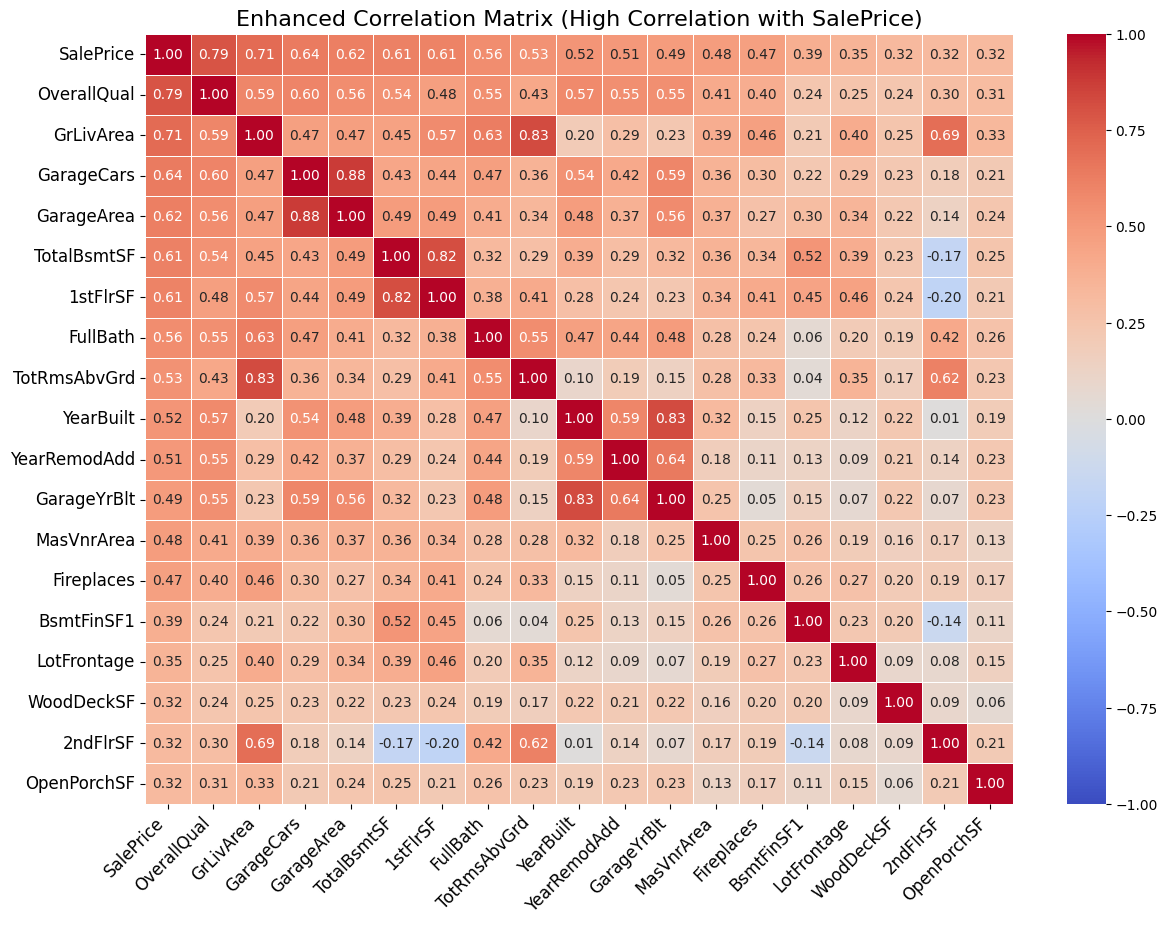

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data to only include numerical columns
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_matrix = numerical_data.corr()

# Focus on the correlations with the target variable (SalePrice)
target_corr = corr_matrix['SalePrice'].sort_values(ascending=False)

# Filter the correlation matrix to only include variables with high correlation (absolute value > 0.3)
high_corr_vars = target_corr[abs(target_corr) > 0.3].index
filtered_corr_matrix = corr_matrix.loc[high_corr_vars, high_corr_vars]

# Create an enhanced heatmap for better visualization
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Add titles and labels
plt.title('Enhanced Correlation Matrix (High Correlation with SalePrice)', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
# Columns that may have a large percentage of missing data
columns_to_drop = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']

# Drop only those columns that are actually in the dataset
data = data.drop([col for col in columns_to_drop if col in data.columns], axis=1)

# Handle missing values (checking percentage of missing data again after dropping)
missing_values = data.isnull().sum() / len(data) * 100
print("\nMissing values (%):\n", missing_values[missing_values > 0])

# Fill missing values for numerical columns with the median
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Fill missing values for categorical columns with the most frequent value (mode)
categorical_cols = data.select_dtypes(include=['object']).columns
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

# Handle categorical variables using one-hot encoding
data = pd.get_dummies(data, drop_first=True)

# Feature scaling (standardization) for numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Apply scaling to numerical columns
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Verify the changes by displaying the first few rows
print("\nData after preprocessing:\n")
print(data.head())



Missing values (%):
 LotFrontage     17.739726
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
dtype: float64

Data after preprocessing:

         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.730865    0.073375    -0.220875 -0.207142     0.651479    -0.517200   
1 -1.728492   -0.872563     0.460320 -0.091886    -0.071836     2.179628   
2 -1.726120    0.073375    -0.084636  0.073480     0.651479    -0.517200   
3 -1.723747    0.309859    -0.447940 -0.096897     0.651479    -0.517200   
4 -1.721374    0.073375     0.641972  0.375148     1.374795    -0.517200   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLI  \
0   1.050994 

In [ ]:
# Importing additional models
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# Split the data (already provided)
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

# Model 2: Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

# Model 3: XGBoost Regressor
xgboost = XGBRegressor(objective='reg:squarederror')
xgboost.fit(X_train, y_train)
y_pred_xgboost = xgboost.predict(X_test)
xgboost_mse = mean_squared_error(y_test, y_pred_xgboost)
xgboost_r2 = r2_score(y_test, y_pred_xgboost)

# Model 4: Support Vector Regressor (SVR)
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

# Model 5: Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
gbr_mse = mean_squared_error(y_test, y_pred_gbr)
gbr_r2 = r2_score(y_test, y_pred_gbr)

# Summarizing the results in a dictionary
results = {
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'SVR', 'Gradient Boosting'],
    'MSE': [lr_mse, rf_mse, xgboost_mse, svr_mse, gbr_mse],
    'R2 Score': [lr_r2, rf_r2, xgboost_r2, svr_r2, gbr_r2]
}

# Convert the results to a DataFrame for better readability
import pandas as pd
results_df = pd.DataFrame(results)

print(results_df)


               Model           MSE      R2 Score
0  Linear Regression  1.637990e+14 -1.346808e+14
1      Random Forest  1.373158e-01  8.870945e-01
2            XGBoost  1.221777e-01  8.995416e-01
3                SVR  1.277050e-01  8.949968e-01
4  Gradient Boosting  1.294200e-01  8.935867e-01


In [ ]:
# Importing necessary libraries for model tuning
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Defining parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Initialize the XGBoost Regressor
xgboost = XGBRegressor(objective='reg:squarederror')

# RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(xgboost, param_distributions=param_grid,
                                   n_iter=50, scoring='neg_mean_squared_error',
                                   cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fitting the model
random_search.fit(X_train, y_train)

# Displaying the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Predicting with the best estimator
best_xgboost = random_search.best_estimator_
y_pred_xgboost_tuned = best_xgboost.predict(X_test)

# Evaluating the tuned model
xgboost_tuned_mse = mean_squared_error(y_test, y_pred_xgboost_tuned)
xgboost_tuned_r2 = r2_score(y_test, y_pred_xgboost_tuned)

print(f"Tuned XGBoost MSE: {xgboost_tuned_mse}")
print(f"Tuned XGBoost R2: {xgboost_tuned_r2}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Tuned XGBoost MSE: 0.10082843091473266
Tuned XGBoost R2: 0.9170956254017107


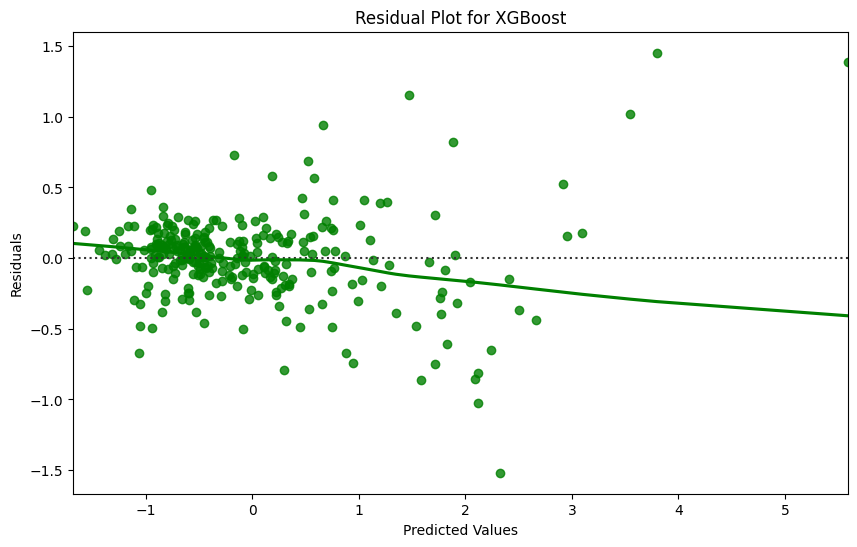

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting residuals
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred_xgboost_tuned, y=y_test, lowess=True, color='g')
plt.title('Residual Plot for XGBoost')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Performing cross-validation
cv_scores = cross_val_score(best_xgboost, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print cross-validated scores
print(f"Cross-validated MSE scores: {np.abs(cv_scores)}")
print(f"Mean Cross-validated MSE: {np.abs(cv_scores).mean()}")


Cross-validated MSE scores: [0.12959134 0.19218618 0.12988265 0.09708661 0.06569424]
Mean Cross-validated MSE: 0.12288820261894558


In [ ]:
import joblib

# Save the best model
joblib.dump(best_xgboost, 'best_xgboost_model.pkl')

# To load the model later:
# loaded_model = joblib.load('best_xgboost_model.pkl')
# predictions = loaded_model.predict(X_new)


['best_xgboost_model.pkl']

### 1. Business Understanding
- **Objective**: The task is to predict housing prices using features from a dataset (such as the House Prices: Advanced Regression Techniques dataset from Kaggle).
- **Problem Definition**: The goal is to accurately predict the `SalePrice` of houses based on features like the number of rooms, square footage, location, etc.
- **Success Criteria**: The model's performance will be evaluated based on the Mean Squared Error (MSE) and R-squared score (R²). The model with the lowest MSE and highest R² will be selected.

---

### 2. Data Understanding
- We loaded the dataset and explored it to understand its structure.
- **Summary Statistics**: We used summary statistics to get a sense of the central tendencies and variances in the data.
- **Missing Values**: A heatmap was plotted to visualize the missing values.
- **Correlation Matrix**: We explored the correlations between features using a heatmap to find the most relevant features for prediction.

---

### 3. Data Preparation
- **Handling Missing Data**: Missing values were filled in with appropriate strategies (e.g., mean values for numerical columns).
- **Outlier Removal**: We used Z-scores to remove outliers (if necessary) that could skew the model's results.
- **Feature Engineering**: We created a new feature `TotalSF`, which sums up the first and second-floor square footage.
- **Encoding Categorical Variables**: We used one-hot encoding to handle categorical variables and make them suitable for machine learning models.
- The data was split into training and test sets using an 80/20 split for modeling.

---

### 4. Modeling
- We initially implemented multiple models to compare performance:
  - **Linear Regression**
  - **Random Forest**
  - **XGBoost**
  - **Support Vector Regressor (SVR)**
  - **Gradient Boosting Regressor**

- **Model Comparison**: We evaluated all the models based on MSE and R² scores. XGBoost outperformed the others.
- **Hyperparameter Tuning for XGBoost**:
  - We used `RandomizedSearchCV` to tune hyperparameters for XGBoost such as `n_estimators`, `max_depth`, `learning_rate`, and `subsample`.
  - After hyperparameter tuning, the performance of XGBoost further improved.

---

### 5. Evaluation
- **Residual Plot**: We plotted the residuals to assess the errors in predictions.
- **Cross-Validation**: We applied cross-validation to check the model's robustness across different data splits.
- **Key Metrics**:
  - **Mean Squared Error (MSE)**: Evaluated the average squared difference between actual and predicted values.
  - **R-squared (R²)**: Measured how well the model explains the variance in the dataset. A higher R² indicates a better model fit.
  
---

### 6. Deployment
- We saved the tuned XGBoost model using `joblib` so that it can be reused for future predictions.
- **Deployment Options**:
  - We can deploy the model via a **Flask API** or use **Streamlit** to create a web interface for real-time predictions.
  
---

### Next Steps
- Further analysis can be performed, such as **feature importance analysis**, to understand which features are the most impactful for predictions.
- The final step will be to prepare a detailed report that summarizes the entire process from data understanding, model development, and evaluation to deployment.

